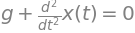

In [41]:
import sympy as sp
from IPython.display import *
%matplotlib inline
sp.init_printing(use_latex=True)
t,C1,C2 = sp.symbols('t,C1,C2')
g = sp.symbols('g', real = True, constant = True)
x=sp.Function("x")(t)
# error kernel crashed when dsolve if using value 9.81 and not a symbol !!!
# eq=sp.Eq(x.diff(t,2) + 9.81,0)
eq=sp.Eq(x.diff(t,2) + g,0)         # équation ballistique, trajectoire
display(eq)


In [42]:
constantes={'C1':0,'C2':0, 'g': 9.81}      # les conditions initiales not mises ici dans le dictionnaire
                                # constantes qui a été défini. C1 est la position initiale 
                                # et C2 la vitesse initiale.
xsol=sp.dsolve(eq,x).rhs          #error kernel crashed here !!!
xsol=xsol.subs(g,constantes['g'])
display(xsol)

In [43]:
xsol=xsol.subs(C1,constantes['C1'])
xsol=xsol.subs(C2,constantes['C2'])

display(xsol)
display()

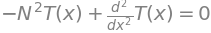

In [44]:
x,N=sp.symbols('x,N')
T=sp.Function("T")(x)
eq=sp.Eq(T.diff(x,2)-N**2*T,0)                 # Transport Phenomena, 10.7, ailette droite
                                             # forme adimensionnelle
eq


In [45]:
Sol=sp.dsolve(eq,T).rhs                      # Solution generale
display(Sol)

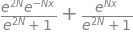

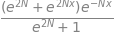

In [46]:
                                             # Trouve C1 et C2 a partir des CL, 2 eq 2 inconnues
S=sp.solve([sp.Eq(Sol.subs(x,0),1),          # condition de Dirichlet 
            sp.Eq(Sol.diff(x).subs(x,1),0)]  # condition de Newman
            ,sp.symbols('C1,C2'))            # 
Final=Sol.subs(S)
display(Final)
final=sp.simplify(Final)
display(final)

####https://docs.sympy.org/dev/guides/solving/solve-ode.html

In [53]:
from sympy import symbols, lambdify
import numpy as np
import scipy.integrate


In [60]:
# Create symbols y0, y1, and y2
y = symbols('y:3')
y

In [56]:
kf, kb = symbols('kf kb')
rf = kf * y[0]**2 * y[1]
rb = kb * y[2]**2
rf, rb


In [57]:
# Derivative of the function y(t); values for the three chemical species
# for input values y, kf, and kb
ydot = [2*(rb - rf), rb - rf, 2*(rf - rb)]
ydot


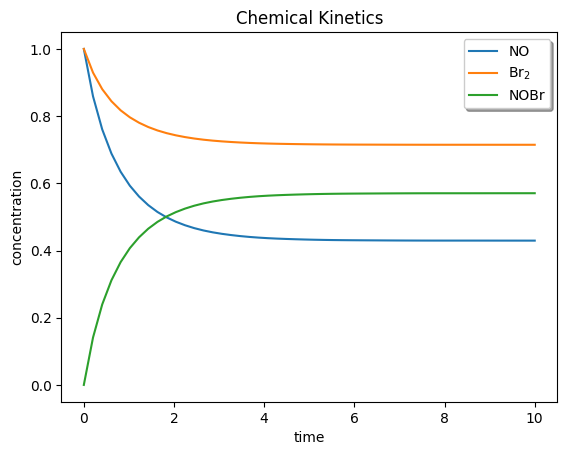

In [61]:
t = symbols('t') # not used in this case
# Convert the SymPy symbolic expression for ydot into a form that
# SciPy can evaluate numerically, f
f = lambdify((t, y, kf, kb), ydot)
k_vals = np.array([0.42, 0.17]) # arbitrary in this case
y0 = [1, 1, 0] # initial condition (initial values)
t_eval = np.linspace(0, 10, 50) # evaluate integral from t = 0-10 for 50 points
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f
solution = scipy.integrate.solve_ivp(f, (0, 10), y0, t_eval=t_eval, args=k_vals)
# Extract the y (concentration) values from SciPy solution result
y = solution.y
# Plot the result graphically using matplotlib
plt.plot(t_eval, y.T) 
# Add title, legend, and axis labels to the plot
plt.title('Chemical Kinetics') 
plt.legend(['NO', 'Br$_2$', 'NOBr'], shadow=True) 
plt.xlabel('time') 
plt.ylabel('concentration') 
# Finally, display the annotated plot
plt.show()

In [67]:
from sympy import *
from sympy.stats import *
mu, Y = symbols('mu Y', real = True, constant = True)
sigma = symbols('sigma', real = True, positive=True)
X = Normal('X', mu, sigma)
E(X, evaluate=True)

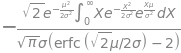

In [66]:
E(X, X>0, evaluate=True)